In [1]:
!nvidia-smi

Fri Sep  3 13:28:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Creating helper functions

In our previous notebooks, we've create a bunch of helpepr functions. Retyping all of them is tedious.

Write a python script which contains all the functions needed and import them into notebook

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-09-03 13:28:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-03 13:28:46 (79.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,walk_through_dir

##Let's get some data

This time we're going to se the pre-trained models in tf.keras.applications and apply them to our own problem (recognizing images of food)

In [4]:
#Get 10% of food101 data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2021-09-03 13:28:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   178MB/s    in 0.9s    

2021-09-03 13:28:50 (178 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [6]:
#Create traininga nd test directory paths

train_dir= "10_food_classes_10_percent/train/"
test_dir= "10_food_classes_10_percent/test/"

In [7]:
import tensorflow as tf

IMG_SIZE=(224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [9]:
#Check out class_names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
#See an example of batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.40000000e+01 1.00000000e+01 9.00000000e+00]
   [2.30918369e+01 1.20918369e+01 1.00918369e+01]
   [2.15663261e+01 1.07806120e+01 8.78061199e+00]
   ...
   [2.24183617e+01 1.64183617e+01 2.64183617e+01]
   [2.49744987e+01 1.89744987e+01 2.89744987e+01]
   [2.41836281e+01 1.81836281e+01 2.81836281e+01]]

  [[2.14285717e+01 1.04285707e+01 8.42857075e+00]
   [1.82142849e+01 7.21428490e+00 5.21428490e+00]
   [1.70561218e+01 6.27040815e+00 4.27040815e+00]
   ...
   [2.29591808e+01 1.49591808e+01 2.59591808e+01]
   [2.62142982e+01 1.82142982e+01 2.92142982e+01]
   [2.53315601e+01 1.73315601e+01 2.83315601e+01]]

  [[1.90663261e+01 8.28061199e+00 6.28061247e+00]
   [1.80561218e+01 7.27040815e+00 5.27040815e+00]
   [2.12142868e+01 1.05969391e+01 8.59693909e+00]
   ...
   [2.81888371e+01 2.04031219e+01 3.07602654e+01]
   [2.51581535e+01 1.73724384e+01 2.77295818e+01]
   [2.71327419e+01 1.93470287e+01 2.97041702e+01]]

  ...

  [[2.54000000e+02 2.54000000e+02 2.54000000e+02]
   [2

#Creating models using Functional API

##Model 0: Building a Transfer Learning Model using the Keras Functional API

In [11]:
#1. Create a basemodel with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

#3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name = "input_layer")

#4. If using a model like ResNet50V2 you will need to normalze inputs
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

#5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base_model: {x.shape}")

#Average pool the outputs of the basemodel
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Createt the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#8. Combine inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

#9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#10. Fit the model
history_0 = model_0.fit(train_data_10_percent, epochs=10,
                        steps_per_epoch=len(train_data_10_percent), validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning","Model_0")])

16719872/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base_model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/Model_0/20210903-132903
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 43s 380ms/step - loss: 1.8947 - accuracy: 0.4080 - val_loss: 1.3205 - val_accuracy: 0.7171
Epoch 2/10
24/24 [==============================] - 7s 268ms/step - loss: 1.1440 - accuracy: 0.7467 - val_loss: 0.9260 - val_accuracy: 0.7895
Epoch 3/10
24/24 [==============================] - 9s 354ms/step - loss: 0.8458 - accuracy: 0.8040 - val_loss: 0.7390 - val_accuracy: 0.8289
Epoch 4/10
24/24 [==============================] - 7s 262ms/step - loss: 0.6945 - accuracy: 0.8320 - val_loss: 0.6739 - val_accuracy: 0.8191
Epoch 5/10
24/24 [==============================] - 7s 263ms/step - loss: 0.6025 - accuracy: 0.8613 - val_loss: 0.5926 - val_accuracy: 0.8569
Epoch 6/10
24/24 [==============================] - 7s 262ms/step - loss: 0.5396 - accuracy: 0.8787 - val_loss: 0.5801 - val_accuracy: 0.8503
Epoch 7/10
24/24 [==============================] - 7s 264ms/step - loss: 0.4665 - accuracy: 0.9000 - val_loss: 0.5484 - val_accuracy: 0.8536
Epoch 8/10
24/24

In [12]:
#Evaluate on full test dataset
model_0.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 0.5022 - accuracy: 0.8576


[0.5022033452987671, 0.8575999736785889]

In [13]:
#Check the layers in our base model
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling (Glob (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


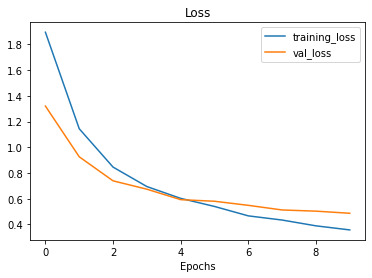

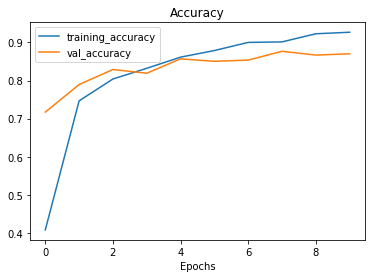

In [14]:
plot_loss_curves(history_0)

#Let's demonstrate the Global Average Pooling Layer

We have a tensor after data goes through 'base_model' with shape (None, 7, 7, 1280)

But then when it passes through GlobalAveragePooling2D, it turns into (None, 1280)

Let's use a similar shaped tensor of shpe (1,4,4,3) and then pass it to GlobalAveragePooling2D

In [15]:
input_shape = (1,4,4,3)

#Create a random Tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}")

#Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled tensor:\n {global_average_pooled_tensor}\n")
print(f"Shape of input_tensor:{input_tensor.shape}")
print(f"Shape of output: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]
2D global average pooled tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input_tensor:(1, 4, 4, 3)
Shape of output: (1, 3)


In [16]:
#Let's replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

#Running a series of Transfer Learning Experiments

How about we see how it performs with 1% of the training data

model-1: Use feature extraction with 1% data and Data Augmentation

model-2: Use feature extraction with 10% data and data augmentation

model-3: Use fine-tuning TL on 10% data with data augmentation

model-4: Use fine-tuning TL on 100% data with data augmentation

In [17]:
#Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
from helper_functions import unzip_data
unzip_data("10_food_classes_1_percent.zip")

--2021-09-03 13:31:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 64.233.191.128, 173.194.74.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   190MB/s    in 0.7s    

2021-09-03 13:31:16 (190 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [18]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [19]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#Adding Data augmentation right into the model

To add data augmentation into our models, we can use layers inside
````
* tf.keras.layers.experimental.preprocessing()
````

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#Create data augmentatioin stage with horizontal flipping, rotation, zooming
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name = "data_augmentation")

###Visualize our data_augmentation layer

In [21]:
#View a random image before and after passing it through the layer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir="10_food_classes_1_percent/train/"+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir + "/" + random_image
print(random_image_path)

10_food_classes_1_percent/train/steak/3653129.jpg


(-0.5, 511.5, 511.5, -0.5)

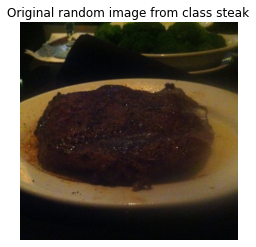

In [22]:
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False)

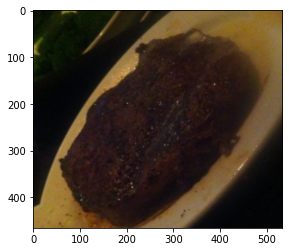

In [23]:
augmented_img = data_augmentation(tf.expand_dims(img,axis=0))
plt.imshow(tf.squeeze(augmented_img)/255.)

#Let's checkout Model checkpointing

The ModelCheckpoint callback immediately saves our model (the full model or just the weights)

In [24]:
#Set checkpoint path
checkpoint_path = "10_percent_model_checkpoints_weights/checkpoint.ckpt"

#Create model checkpoint callback to save model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

#Loading a checkpointed weights

Loading in checkpointed weights allows you to go back to a specific checkpoint

```
model.load_weights(checkpoint_path)
```

This loads model named 'model' to a specific checkpoint that is saved in checkpoint_path

###Let's fine-tune EfficientNet with Transfer Learning with 10% data

**Note:** Fine-tuning usually works best **after** training a feature extractor model for a few epochs with large amounts of custom data

In [25]:
#1. Create a basemodel with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

#3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name = "input_layer")

#4. If using a model like ResNet50V2 you will need to normalze inputs
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = data_augmentation(inputs)
#5. Pass the inputs to the base_model
x = base_model(x)
print(f"Shape after passing inputs through base_model: {x.shape}")

#Average pool the outputs of the basemodel
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Createt the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#8. Combine inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

Shape after passing inputs through base_model: (None, None, None, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)


In [26]:
model_0.layers

In [27]:
for layer in model_0.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fa267d76c50> True
<keras.engine.sequential.Sequential object at 0x7fa2b2624950> True
<keras.engine.functional.Functional object at 0x7fa267a38590> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7fa26793da50> True
<keras.layers.core.Dense object at 0x7fa2677ccb90> True


In [28]:
for i,layer in enumerate(model_0.layers[2].layers): #Viewing all layers in EfficientNet layer
  print(i,layer.name,layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [29]:
#There are no trainable variables, since we set them to False
#To begin fine-tuning, let's start by setting all layers except last 10 layers in base_model to True

base_model.trainable=True
for layer in base_model.layers[:-10]:
  layer.trainable = False

#Recompile the model everytime we make a change
model_0.compile(loss="categorical_cross_entropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #lower lr by atleast 10x
                metrics=['accuracy'])

In [30]:
for i,layer in enumerate(model_0.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [31]:
def compare_historys(original, new_history, initial_epochs=5):
  """
  Compares two TensorFlow History Objects
  """
  #Get original history measurements
  acc=original.history['accuracy']
  loss=original.history['loss']

  val_acc=original.history['val_accuracy']
  val_loss=original.history['val_loss']

  #Combine original metrics with new_history metrics
  total_acc=acc+new_history['accuracy']
  total_loss=loss+new_history['loss']

  total_val_acc=val_acc+new_history.history['val_accuracy']
  total_val_loss=val_loss+new_history['val_loss']

  #Make plots
  plt.figure(8,8)
  plt.subplot(2,1,1)
  plt.plot(total_acc,label="Training Accuracy")
  plt.plot(total_val_acc,label="Validation Accuracy")
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  plt.figure(8,8)
  plt.subplot(2,1,2)
  plt.plot(total_loss,label="Training Loss")
  plt.plot(total_val_loss,label="Validation Loss")
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")